In [1]:
import os
for dirname, _, filenames in os.walk('A:/New folder/Bengaluru_House_Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
# important python libraries for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
plt.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings('ignore')

# load dataset from input directory
df = pd.read_csv("A:/New folder/Bengaluru_House_Data.csv") 
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [3]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
#dropping some columns
df2 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
#before dropping null value, lets check it column-wise
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
# We can fill the missing-values using median but
# here the missing values are less compare to dataset size, so we are dropping
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
#to drop duplicate values
df4 = df3.drop_duplicates()
print("Dataset size before dropping duplicate values: {} and after {}".format(df3.shape, df4.shape))

Dataset size before dropping duplicate values: (13246, 5) and after (12365, 5)


In [8]:
#lets check size column
df4['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
#from above analysis, we found the datatype inappropriate for ml-model
#4-Bedroom and 4 BHK are same and so on. We create new column with integer type and 
# convert the given size-column. We don't drop size column for later use.
df4['bhk'] = df4['size'].apply(lambda x: int(x.split(' ')[0]))
df4.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df4['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
# the above analysis shows an inappropriate data in total_sqft column
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
# we use ~ negative opperator to show the inappropriate data
df4[~df4['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [14]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
df5 = df4.copy()
df5['total_sqft'] = df5['total_sqft'].apply(convert_sqft_to_num)
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [16]:
df5.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [17]:
# dropping the created missing values with our convert_sqft_to_num
df5=df5.dropna()
df5.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [18]:
df6 = df5.copy()
# the given price is in lac unit and we are converting it into rupees
df6["price_per_sqft"] = df6['price']*100000/df6['total_sqft']
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
len(df6.location.unique())

1298

In [20]:
# 1298 is high dimensionality problem. if we apply one hot-encoding on this,
# we will get high number of feature.
# we will check the number of rows for each category and will make some threshold
# for keeping the category. Obviously categories with less rows(samples)
# will be placed in 'other' category.
df6.location = df6.location.apply(lambda x: x.strip()) # remove leading or end spaces
location_stats = df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               500
Sarjapur  Road           357
Electronic City          275
Thanisandra              224
Kanakpura Road           215
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [21]:
len(location_stats[location_stats <= 10])

1057

In [22]:
# we add all these 1057 unique categories with less or equal to 10 rows into 'other' category
location_stats_less_than_ten = location_stats[location_stats<=10]
df6.location = df6.location.apply(lambda x: 'other' if x in location_stats_less_than_ten else x)
df6.location.head(10)

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
5                  Whitefield
6            Old Airport Road
7                Rajaji Nagar
8                Marathahalli
9                       other
Name: location, dtype: object

In [23]:
df6[df6.total_sqft/df6.bhk <300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [24]:
# to remove the outiers
df7 = df6[~(df6.total_sqft/df6.bhk <300)]
print("Data Size before outlier removal: {} and after: {}".format(df6.shape, df7.shape))

Data Size before outlier removal: (12319, 7) and after: (11590, 7)


In [25]:
df7.price_per_sqft.describe()

count     11590.000000
mean       6402.285227
std        4273.223109
min         267.829813
25%        4255.319149
50%        5347.150569
75%        7000.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [26]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [27]:
df8 = remove_pps_outliers(df7)
df8.shape

(9545, 7)

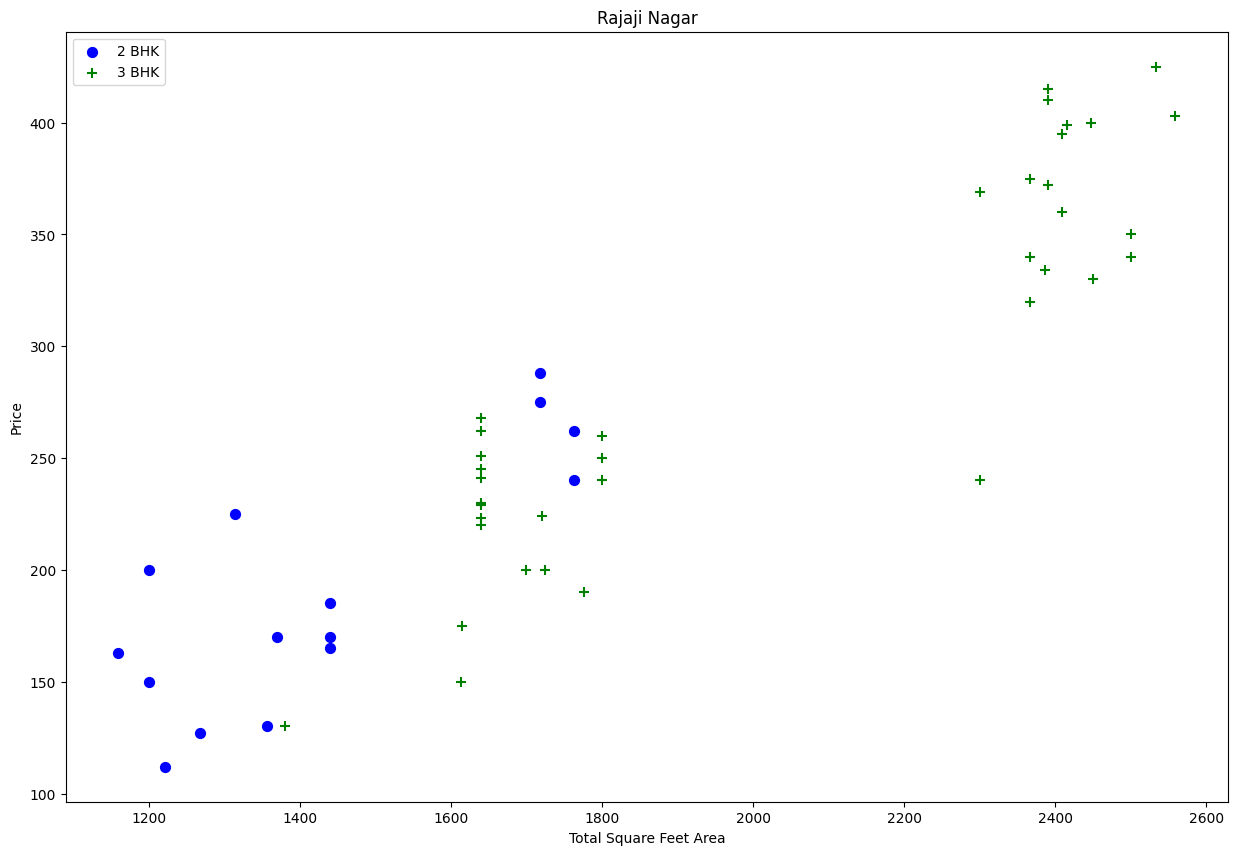

In [28]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

# we can check for different locations
plot_scatter_chart(df8,'Rajaji Nagar')

In [29]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df9=remove_bhk_outliers(df8)
df9.shape

(6802, 7)

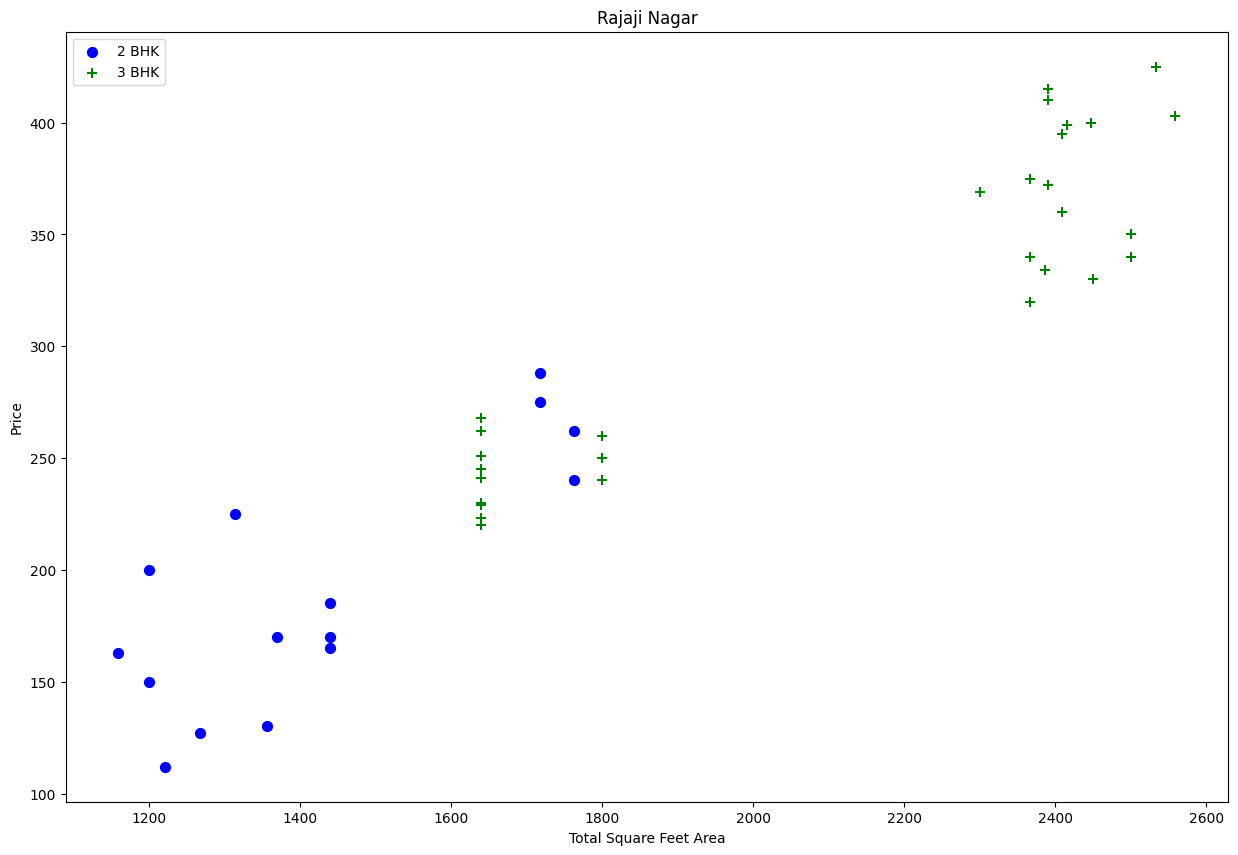

In [30]:
# let re-check the price using our defined scatter plot function
plot_scatter_chart(df9,'Rajaji Nagar')

Text(0, 0.5, 'Count')

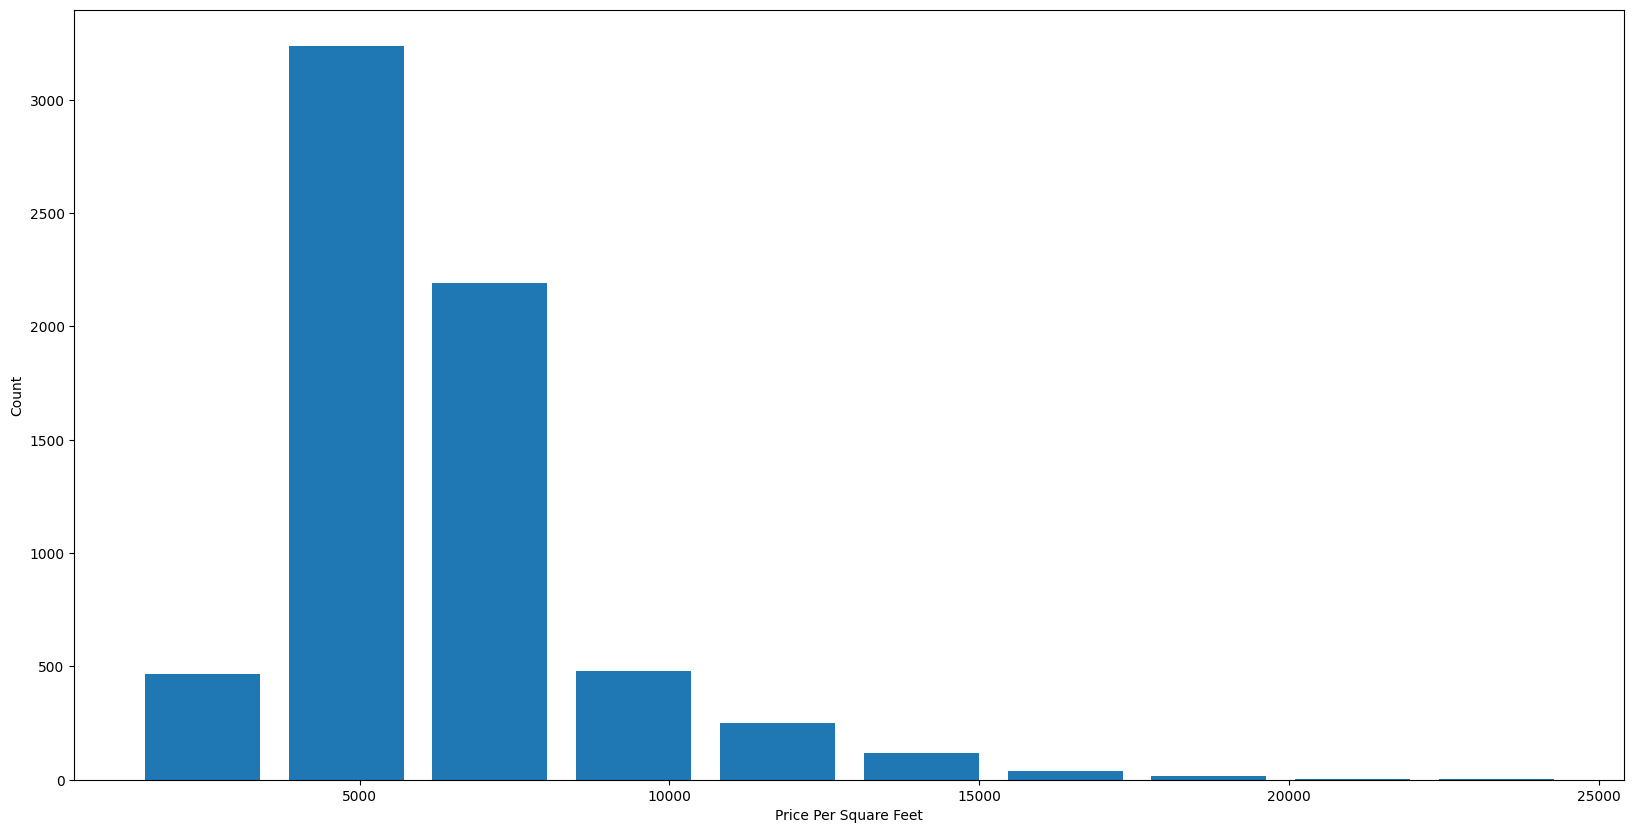

In [31]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [32]:
# lets first check if there is any such case
df9[df9.bath>df9.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1468,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
4756,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6091,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7697,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [33]:
#lets remove the rows that doesn't satisfy the threshold of bathrooms
data = df9[df9.bath<df9.bhk+2]
data.shape

(6721, 7)

In [34]:
data = data.drop(['size','price_per_sqft'], axis=1)
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [35]:
dummies = pd.get_dummies(data.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# to avoid dummy trap, we will drop one column from dummy data 
# and consider 0 value instead of that column value
data2 = pd.concat([data,dummies.drop('other',axis='columns')], axis='columns')
data2.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
# now we can drop location column because that is converted into numeric
data3 = data2.drop('location',axis='columns')
data3.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
X = data3.drop('price',axis="columns")
Y = data3.price
print("Depented Features: {}    Independent Feature: {}".format(X.shape, Y.shape))

Depented Features: (6721, 233)    Independent Feature: (6721,)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [40]:
from sklearn.linear_model import LinearRegression
#build model
lr_clf = LinearRegression()
# training our model
lr_clf.fit(X_train,Y_train)
#testing our model
lr_clf.score(X_test, Y_test)

0.7881113050448308

In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.85204915, 0.79215257, 0.80338054, 0.80457136, 0.76088915,
       0.81696319, 0.83177313, 0.84590375, 0.82192512, 0.86062704])

#### **Using GridSearchCV method to find best algorithm for our model**

In [43]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, Y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming you have X and Y defined somewhere
find_best_model_using_gridsearchcv(X, Y)


,model,best_score,best_params
0,linear_regression,0.802609,{}
1,lasso,0.660424,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.706623,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


It is found that Linear Regression model performs well and should be selected for price prediction

In [45]:
# lr_cfr is already trained
# we write a function to predict prices for some data
def predict_price(location,area,bathroom, bedroom):
    loc_index = np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0] = area
    x[1] = bathroom
    x[2] = bedroom
    if loc_index >=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

predict_price('1st Phase JP Nagar',1000,3,3)

93.02838480012359

### **To export(save) the model into pickle file to use in website for prediction**

In [46]:
import pickle
model_file = "banglore_home_prices_model.pickle"
with open(model_file,'wb') as f:
    pickle.dump(lr_clf,f)

#### **We also store the columns name for later use in website**


In [47]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
    }
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))